In [90]:
from datetime import date
studentName="Sanchana Mohankumar"
studentEmail="mohankumar.s@northeastern.edu"
homework=7
contributedPercentage=0
print("IE 7300: Statistical learning for Engineering")
print("\n"*15)
print(f'Homework -{homework}')
print(f'Student name :{studentName}')
print(f'Student Email :{studentEmail}')
print("\n"*15)
print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7300: Statistical learning for Engineering
















Homework -7
Student name :Sanchana Mohankumar
Student Email :mohankumar.s@northeastern.edu
















Percentage of Effort Contributed by Student : 0%
Submission Date: 2022-11-01


In [91]:
## imports ##
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Custom decision tree regressor
from statmodels.decisiontrees import decisiontreeregressor
#Custom random forest regressor
from statmodels.random_forest import RandomForestRegressor
#Custom lasso regressor
from statmodels.regression import LassoRegression
#Custom gradient boosting regressor
from statmodels.gradientboosting import GradientBoostTreeRegressor

#Find performance
from sklearn.metrics import mean_squared_error, r2_score

## Appliances Energy Prediction Dataset - Regression

We can now look at a regression problem, the appliances energy dataset. Let's import these data into the notebook, and do some exploratory analysis.

In [92]:
import warnings
warnings.filterwarnings("ignore")

#load the energy dataset
energy_data = pd.read_csv("/Users/sanchana/Downloads/energydata_complete.csv")
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Data Description

1. date time year-month-day hour:minute:second
2. Appliances, energy use in Wh
3. lights, energy use of light fixtures in the house in Wh
4. T1, Temperature in kitchen area, in Celsius
5. RH_1, Humidity in kitchen area, in %
6. T2, Temperature in living room area, in Celsius
7. RH_2, Humidity in living room area, in %
8. T3, Temperature in laundry room area
9. RH_3, Humidity in laundry room area, in %
10. T4, Temperature in office room, in Celsius
11. RH_4, Humidity in office room, in %
12. T5, Temperature in bathroom, in Celsius
13. RH_5, Humidity in bathroom, in %
14. T6, Temperature outside the building (north side), in Celsius
15. RH_6, Humidity outside the building (north side), in %
16. T7, Temperature in ironing room , in Celsius
17. RH_7, Humidity in ironing room, in %
18. T8, Temperature in teenager room 2, in Celsius
19. RH_8, Humidity in teenager room 2, in %
20. T9, Temperature in parents room, in Celsius
21. RH_9, Humidity in parents room, in %
22. To, Temperature outside (from Chievres weather station), in Celsius
23. Pressure (from Chievres weather station), in mm Hg
24. RH_out, Humidity outside (from Chievres weather station), in %
25. Wind speed (from Chievres weather station), in m/s
26. Visibility (from Chievres weather station), in km
27. Tdewpoint (from Chievres weather station), Â°C
28. rv1, Random variable 1, nondimensional
29. rv2, Random variable 2, nondimensional

## Data Analysis

In [93]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [94]:
print('The number of rows in dataset is - ' , energy_data.shape[0])
print('The number of columns in dataset is - ' , energy_data.shape[1])

The number of rows in dataset is -  19735
The number of columns in dataset is -  29


In [95]:
energy_data.duplicated().sum()

0

In [96]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Observation: 

1. Shape - As we can see in our dataset we have 19735 rows and 29 columns 
2. Duplicates - As we can see there are no duplicates in our dataset
3. Datatype - As there are no categorical columns in our dataset we dont need to perform encoding
4. Describe - As we can see column light has value 0 in most of the rows as it does not contribute much to the dataset so we will remove the column from the dataset 

## EDA

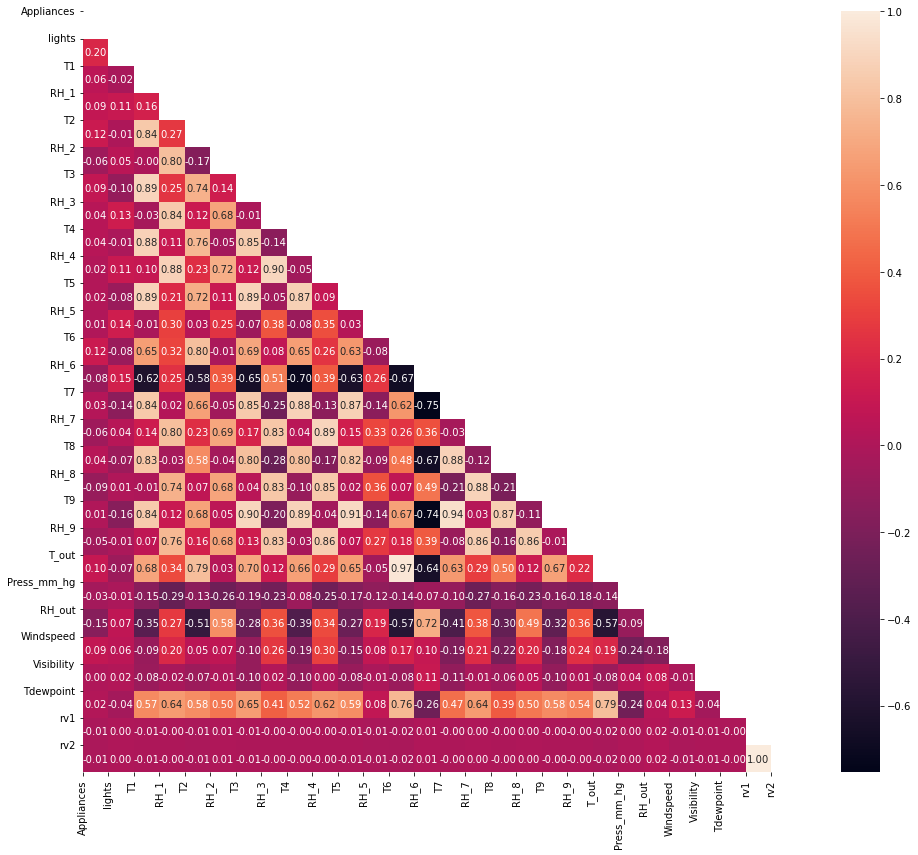

In [97]:
corr = energy_data.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

Observation: 
- rv1, rv2  ->     1.000000
- T6, T_out ->     0.974683
- T7, T9    ->     0.943921
- T5, T9    ->     0.910009
- T3, T9    ->     0.900209

As we can see column rv1, rv2, T3, T5, T6, T_out, T7, T9 and Visibility are highly correlated columns as their correlation values are more than 0.9. So in order to improve our model performance we are removing rv1, rv2, T6, T9 and Visibility

##  Data Preprocessing 

### Scaling Data

We are dropping following columns due to high correlation

In [98]:
energy_data = energy_data.drop(["lights","date","rv1","rv2","Visibility","T6","T9"], axis = 1)

In [99]:
sc = StandardScaler()

In [100]:
# Scaling data 
energy_data_std = sc.fit_transform(energy_data)
energy_data = pd.DataFrame(energy_data_std, columns= energy_data.columns)
energy_data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint
0,-0.367676,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,-1.314903,...,-1.453646,1.219861,-1.957509,1.141572,0.958136,-0.152647,-2.976328,0.82208,1.207694,0.366975
1,-0.367676,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,-1.314903,...,-1.453646,1.206825,-1.957509,1.134554,0.965363,-0.174588,-2.962813,0.82208,1.071703,0.343135
2,-0.465215,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,-1.314903,...,-1.453646,1.182057,-1.957509,1.109032,0.950910,-0.196529,-2.949298,0.82208,0.935713,0.319294
3,-0.465215,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,-1.314903,...,-1.485243,1.154030,-2.008631,1.082233,0.926821,-0.218470,-2.935783,0.82208,0.799723,0.295454
4,-0.367676,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,-1.296832,...,-1.453646,1.142298,-2.008631,1.082233,0.926821,-0.240411,-2.922268,0.82208,0.663733,0.271613


In [101]:
# Splitting Predictor variables and target variables
y = energy_data['Appliances']
X = energy_data.drop(['Appliances'], axis = 1)

In [102]:
X.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint
0,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,-1.314903,0.471160,...,-1.453646,1.219861,-1.957509,1.141572,0.958136,-0.152647,-2.976328,0.82208,1.207694,0.366975
1,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,-1.314903,0.471160,...,-1.453646,1.206825,-1.957509,1.134554,0.965363,-0.174588,-2.962813,0.82208,1.071703,0.343135
2,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,-1.314903,0.458968,...,-1.453646,1.182057,-1.957509,1.109032,0.950910,-0.196529,-2.949298,0.82208,0.935713,0.319294
3,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,-1.314903,0.458968,...,-1.485243,1.154030,-2.008631,1.082233,0.926821,-0.218470,-2.935783,0.82208,0.799723,0.295454
4,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,-1.296832,0.458968,...,-1.453646,1.142298,-2.008631,1.082233,0.926821,-0.240411,-2.922268,0.82208,0.663733,0.271613


Create custom regression models using the (https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) dataset ownload wine.csvDownload )and evaluate your model results. Split the dataset into training and test dataset 80:20.

### Splitting Data

In [104]:
#Splitting data for model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

- a) Create a Lasso regression, decision tree, Random forest, and GradientBoost models. Fit the model using the training dataset and find the model RMSE and R-Square. Explain each model's outcome, finding, and accuracy
- b) Predict the models using the test dataset, and provide the performance metrics. Compare the four models' performance metrics, and explain at least four findings on each of the models. Do not repeat the code to fit the model
- c) Do you see any bias and variance issues? How do you interpret each model output? (4x3=12 points)
- d) Write a function to find important features in each model? Why is it an important feature of the model? Explain with some statistical evidence

### Decision Tree regressor

In [108]:
dtModel = decisiontreeregressor(min_samples_split=3, max_depth=3)
dtModel.fit(X_train, y_train.reshape(-1,1))

In [136]:
y_pred_dt_train = dtModel.predict(X_train.values)
print("-------------------------------------------------------")
print('Decision Tree - Train')
print('Decision Tree - Root Mean Squared error:', round(np.sqrt(mean_squared_error(y_train, y_pred_dt_train)),4))
print('Decision Tree - R-Squared:', round(r2_score(y_train, y_pred_dt_train),4))


y_pred_dt_test = dtModel.predict(X_test.values)
print("-------------------------------------------------------")
print('Decision Tree - Test')
print('Decision Tree - Root Mean Squared error:', round(np.sqrt(mean_squared_error(y_test, y_pred_dt_test)),4))
print('Decision Tree - R-Squared:', round(r2_score(y_test, y_pred_dt_test),4))

-------------------------------------------------------
Decision Tree - Train
Decision Tree - Root Mean Squared error: 0.9465
Decision Tree - R-Squared: 0.1225
-------------------------------------------------------
Decision Tree - Test
Decision Tree - Root Mean Squared error: 0.9094
Decision Tree - R-Squared: 0.0969


### Print decision tree

In [126]:
dtModel.print_tree()

|- RH_out <= 0.06149026631735046 :Variance Red 0.0241
 left-->|- T3 <= 0.4149373078312392 :Variance Red 0.0215
  left-->|- RH_3 <= 1.7967462409245383 :Variance Red 0.0252
    left-->|- T_out <= -1.8797221530036452 :Variance Red 0.0137
        left-->4.4443
        right-->0.0524
    right-->|- RH_1 <= 1.1912603261507193 :Variance Red 1.4136
        left-->3.1647
        right-->0.6931
  right-->|- T4 <= 0.5449475603757508 :Variance Red 0.1285
    left-->|- RH_5 <= -0.15665185804733942 :Variance Red 0.2061
        left-->1.4976
        right-->0.5723
    right-->|- T3 <= 2.3718717173852126 :Variance Red 0.053
        left-->0.1395
        right-->1.0962
 right-->|- RH_1 <= 0.009280107897004546 :Variance Red 0.012
  left-->|- RH_5 <= -1.4654438036704005 :Variance Red 0.0181
    left-->|- T1 <= -1.2182696056360676 :Variance Red 19.2659
        left-->8.606
        right-->-0.1726
    right-->|- RH_8 <= -0.6344930965938532 :Variance Red 0.016
        left-->-0.0279
        right-->-0.3202


### List of features used in the decision tree

In [127]:
dtFeatures = pd.DataFrame(dtModel.get_features())
dtFeatures.columns = ['featurename','treelevel']
dtFeatures = dtFeatures.drop_duplicates()
dtFeatures.sort_values('treelevel')

,featurename,treelevel
14,RH_out,0
6,T3,1
13,RH_1,1
2,RH_3,2
5,T4,2
9,RH_5,2
12,RH_2,2
0,T_out,3
1,RH_1,3
3,RH_5,3


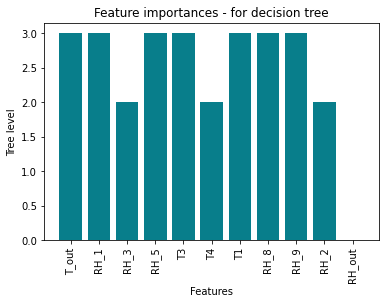

In [141]:
dtModel.get_features()
plt.bar(x= dtFeatures['featurename'], height= dtFeatures['treelevel'], color='#087E8B')
plt.title('Feature importances - for decision tree')
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Tree level')
plt.show()

#### Model Performance:

-------------------------------------------------------
Decision Tree - Train
Decision Tree - Root Mean Squared error: 0.9465
Decision Tree - R-Squared: 0.1225

-------------------------------------------------------
Decision Tree - Test
Decision Tree - Root Mean Squared error: 0.9094
Decision Tree - R-Squared: 0.0969

#### Training and Test Dataset Results

As we know for our model we are predicting the power used by appliances by various metrics like temperatures, Humidity etc. So for our model we are observing the model performance by RMSE and R2 score 

RMSE - As per RMSE we know the average difference between predicted values by the model and actual value by our dataset. The lower the value RMSE value better the model is performing. So as per our model we have high RMSE value for both Train and Test dataset which results in poor model performance

R2score - As per R2score of our model which says the goodness of fit. So higher the R2score better our model performance and how well the regression fit the model. In our case we have very low R2score for both Train and Test dataset which results in poor model performance

#### Variance Bias Tradeoff

As per Bias Variance Tradeoff for our decision Tree Regressor model its Underfitting so we have high bias and low Variance and doesnot satisfy Variance Bias Tradeoff 

#### Feature Importance
As per Feature Importance we can Feature on Level 0 is more important followed by other level as Level 0 root node is selected based on the feature importance and its cotnribution to the target variable. 
So as per the figure RH out is most important feature followed by RH3, T4, RH2 and the rest 


### Lasso Regression

In [ ]:
lassoModel = LassoRegression(alpha=0.1)
lassoModel.fit(X_train.values, y_train.values) 
print("Lasso model cofficients :",lassoModel.coef_)

In [135]:
y_pred_ltrain = lassoModel.predict(X_train.values)
print("-------------------------------------------------------")
print('Lasso Regression - Train')
print('Lasso Regression - Root Mean Squared error:', round(np.sqrt(mean_squared_error(y_train,y_pred_ltrain)),4))
print('Lasso Regression - R-Squared:', round(r2_score(y_train,y_pred_ltrain),4))


y_pred_ltest = lassoModel.predict(X_test.values)
print("-------------------------------------------------------")
print('Lasso Regression - Test')
print('Lasso Regression - Root Mean Squared error:', round(np.sqrt(mean_squared_error(y_test, y_pred_ltest)),4))
print('Lasso Regression - R-Squared:', round(r2_score(y_test, y_pred_ltest),4))

-------------------------------------------------------
Lasso Regression - Train
Lasso Regression - Root Mean Squared error: 0.9832
Lasso Regression - R-Squared: 0.0531
-------------------------------------------------------
Lasso Regression - Test
Lasso Regression - Root Mean Squared error: 0.9304
Lasso Regression - R-Squared: 0.0547


### Feature importance for Lasso regression

In [32]:
lassoImportantfeatures = pd.DataFrame(data={'feature': X.columns})
lassoImportantfeatures["importance"] = pd.DataFrame(lassoModel.coef_[1:])
lassoImportantfeatures = lassoImportantfeatures.sort_values(by='importance', ascending=False)

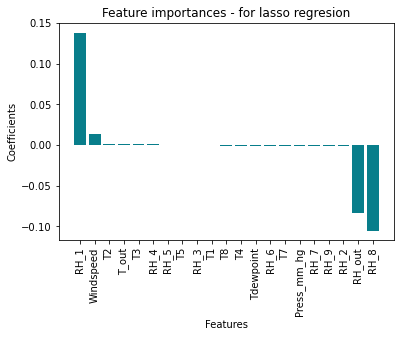

In [142]:
plt.bar(x=lassoImportantfeatures['feature'], height=lassoImportantfeatures['importance'], color='#087E8B')
plt.title('Feature importances - for lasso regresion')
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

As we know for our model we are predicting the power used by appliances by various metrics like temperatures, Humidity etc. So for our model we are observing the model performance by RMSE and R2 score 

#### Training and Test Dataset Results
RMSE - As per RMSE we know the average difference between predicted values by the model and actual value by our dataset. The lower the value RMSE value better the model is performing. So as per our model we have high RMSE value for both Train and Test dataset which results in poor model performance

R2score - As per R2score of our model which says the goodness of fit. So higher the R2score better our model performance and how well the regression fit the model. In our case we have very low R2score for both Train and Test dataset which results in poor model performance

#### Variance Bias Tradeoff

As per Bias Variance Tradeoff for our Lasso Regression model its Underfitting so we have high bias and low Variance and doesnot satisfy Variance Bias Tradeoff 

#### Feature Importance

As per the figure above for Feature Importance of Lasso Regression RH_ 1 is the most important feature followed by Windspeed 

### Random Forest Regressor

In [137]:
#create a random forest with default values
rfr = RandomForestRegressor()
rfr.fit(X_train.values, y_train.values)

In [138]:
y_pred_rftrain = rfr.predict(X_train.values)
print("-------------------------------------------------------")
print('Random Forest - Train')
print('Random Forest - Root Mean Squared error:', round(np.sqrt(mean_squared_error(y_train,y_pred_rftrain)),4))
print('Random Forest - R-Squared:', round(r2_score(y_train,y_pred_rftrain),4))


y_pred_rftest = rfr.predict(X_test.values)
print("-------------------------------------------------------")
print('Random Forest - Test')
print('Random Forest - Root Mean Squared error:', round(np.sqrt(mean_squared_error(y_test, y_pred_rftest)),4))
print('Random Forest - R-Squared:', round(r2_score(y_test, y_pred_rftest),4))

-------------------------------------------------------
Random Forest - Train
Random Forest - Root Mean Squared error: 0.2492
Random Forest - R-Squared: 0.9392
-------------------------------------------------------
Random Forest - Test
Random Forest - Root Mean Squared error: 0.5935
Random Forest - R-Squared: 0.6154


In [177]:
def plot_feature_importance(importance,names,model_type):

     #Create arrays from feature importance and feature names
        feature_importance = np.array(importance)
        feature_names = np.array(names)

     #Create a DataFrame using a Dictionary
        data={'feature_names':feature_names,'feature_importance':feature_importance}
        fi_df = pd.DataFrame(data)

     #Sort the DataFrame in order decreasing feature importance
        fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

     #Define size of bar plot
        plt.figure(figsize=(10,8))
     #Plot Searborn bar chart
        sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
     #Add chart labels
        plt.title(model_type + 'FEATURE IMPORTANCE')
        plt.xlabel('FEATURE IMPORTANCE')
        plt.ylabel('FEATURE NAMES')

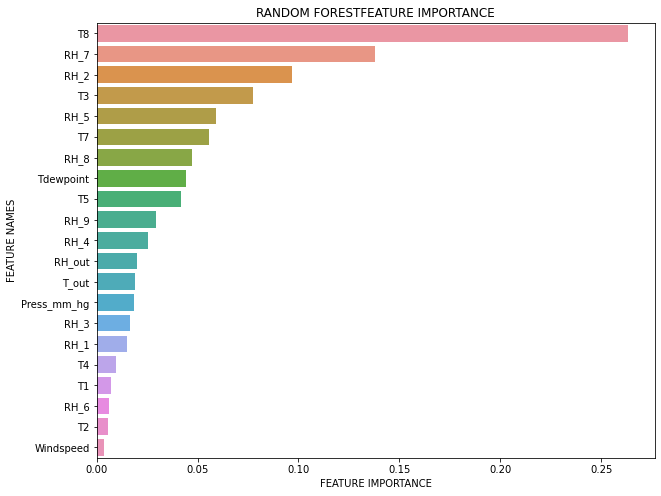

In [180]:
plot_feature_importance(rfr.feature_importances_, X.columns,'RANDOM FOREST')

As we know for our model we are predicting the power used appliances in various metrics like temperatures, Humidity etc. So for our model we are observing the model performance by RMSE and R2 score

#### Training and Test Dataset Results
RMSE - As per RMSE we know the average difference between predicted values by the model and actual value by our dataset. The lower the value RMSE value better the model is performing. So as per our model we have low RMSE value for both Train and Test dataset which results in good model performance

R2score - As per R2score of our model which says the goodness of fit. So higher the R2score better our model performance and how well the regression fit the model. In our case we have very high R2score for Train and better R2score than other models but compared to Train our Test dataset results is less value which results in overfiting issue 

#### Variance Bias Tradeoff

As per Bias Variance Tradeoff for our Random Forest Regressor model its Overfitting so we have Low bias and high Variance and doesnot satisfy Variance Bias Tradeoff 

#### Feature Importance

As per the figure above for Feature Importance of Random Forest T8 followed by RH7, RH2, T3, RH5 is the most important feature

### Gradient Boosting model

In [173]:
gradBoostModel = GradientBoostTreeRegressor(n_elements=1000, learning_rate=0.01)
gradBoostModel.fit(X_train.values, y_train.values)

In [174]:
y_pred_gbtrain = gradBoostModel.predict(X_train.values)
print("-------------------------------------------------------")
print('Gradient Boost Regression - Train')
print('Gradient Boost Regressiont - Root Mean Squared error:', round(np.sqrt(mean_squared_error(y_train,y_pred_gbtrain)),4))
print('Gradient Boost Regression - R-Squared:', round(r2_score(y_train,y_pred_gbtrain),4))


y_pred_gbtest = gradBoostModel.predict(X_test.values)
print("-------------------------------------------------------")
print('Gradient Boost Regression - Test')
print('Gradient Boost Regression - Root Mean Squared error:', round(np.sqrt(mean_squared_error(y_test, y_pred_gbtest)),4))
print('Gradient Boost Regression - R-Squared:', round(r2_score(y_test, y_pred_gbtest),4))

-------------------------------------------------------
Gradient Boost Regression - Train
Gradient Boost Regressiont - Root Mean Squared error: 0.0034
Gradient Boost Regression - R-Squared: 1.0
-------------------------------------------------------
Gradient Boost Regression - Test
Gradient Boost Regression - Root Mean Squared error: 0.4201
Gradient Boost Regression - R-Squared: 0.8805


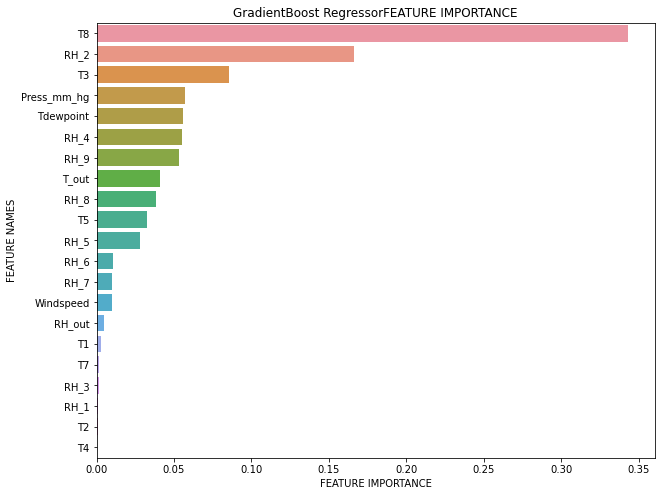

In [186]:
plot_feature_importance(gradBoostModel.feature_importances_, X.columns,'GradientBoost Regressor')

As we know for our model we are predicting the power used appliances in various metrics like temperatures, Humidity etc. So for our model we are observing the model performance by RMSE and R2 score 

#### Training and Test Dataset Results
RMSE - As per RMSE we know the average difference between predicted values by the model and actual value by our dataset. The lower the value RMSE value better the model is performing. So as per our model we have low RMSE value for both Train and Test dataset which results in good model performance

R2score - As per R2score of our model which says the goodness of fit. So higher the R2score better our model performance and how well the regression fit the model. In our case we have very high R2score for Train and better R2score than other models like Lasso and Decision Tree but compared to Train our Test dataset result is less value which results in overfiting issue 

#### Variance Bias Tradeoff

As per Bias Variance Tradeoff for our GradientBoost Regressor model its Overfitting so we have Low bias and high Variance and doesnot satisfy Variance Bias Tradeoff 

#### Feature Importance

As per the figure above for Feature Importance of GradientBoost Regressor model T8 followed by RH2, T3, RH9 is the most important features

##### Question:
Compare the four models' performance metrics, and explain at least four findings on each of the models

1. Overall on comparing all 4 models we observe that Lasso and Decision Tree are Underfitting and has High bias and Low Variance and does not satisfy Variance Tradeoff 
2. On the other side Random Forest and Gradient Boost Regressor showed overfitting issues followed by Low bias and High Variance
3. As the model complexty is high Decision Tree and Lasso regression is underperforming especially Decision tree performs well with lesser features as this dataset had lot of features the model underperformed
4. As we know Random Forest performs well with complex dataset also performs parallely which makes it a better model with respect to performance  
5. As far as GB Boost we know it outperforms other regresion models but in our case it took more than 6 hours to complete the model processing which makes it a more complex and time consuming model eventhough it gives better accuracy than other models.
6. Lasso regression model is the one which performed faster than other model followed by decision tree and random forest